# Week 8 Assignment

### Using pandas to import a .CSV and visualizing data

##### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.

##### 2. Review the data and the provided data set description.

##### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [56]:
# Below I imported the necessary modules and files

import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import read_csv

filename = r"C:\Users\thety\Google Drive\CUNY\IS362\\Week 8\car-data.csv"

# Below I created the dataframe film_ratings

car_data = pd.read_csv(filename, index_col="car name")

# Below I dropped blank columns, not sure where they came from

car_data = car_data.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

##### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

##### The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [61]:
# Below I replace all '?' values under 'horsepower' with NaN

car_data['horsepower'].replace(r'?', np.nan, inplace = True)

# Below I replace all 'origin' column values under with 'USA’, ‘Asia’, and ‘Europe’

car_data['origin'] = car_data['origin'].astype(str) 

car_data['origin'] = car_data['origin'].replace(str(1),'USA')
car_data['origin'] = car_data['origin'].replace(str(2),'Asia')
car_data['origin'] = car_data['origin'].replace(str(3),'Europe')

car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,USA
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,USA
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,USA
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,USA
ford torino,17.0,8,302.0,140,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,USA
vw pickup,44.0,4,97.0,52,2130,24.6,82,Asia
dodge rampage,32.0,4,135.0,84,2295,11.6,82,USA


##### 6. Create a bar chart that shows the distribution for cylinders.

Text(0, 0.5, '# of cars')

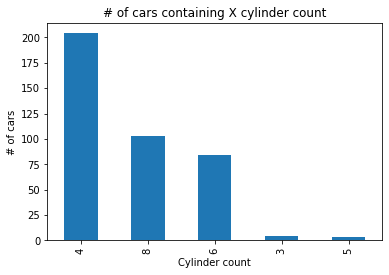

In [59]:
# Below I create a bar graph showing how many cars have engines with X amount of cylinders

bar_graph = car_data['cylinders'].value_counts()

bar_graph.plot(kind="bar", title ="# of cars containing X cylinder count")

plt.xlabel("Cylinder count")
plt.ylabel("# of cars")

##### 7. Create a scatterplot that shows the relationship between horsepower and weight.

Text(0, 0.5, 'Horsepower')

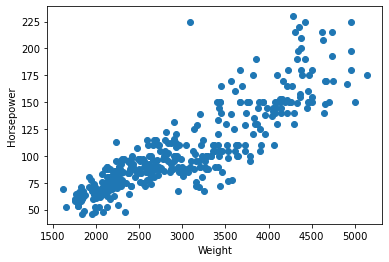

In [71]:
# Below I adjust the data so it is as a datafram, does not include NaN values, and ensure that weight and horsepower are integers

car_data = pd.DataFrame(car_data)
car_data = car_data.dropna()
car_data = car_data.astype({"weight": int, "horsepower": int})

#Below I identify the 'x' and 'y' axes for the graph, and create a scatterplot

a = car_data.weight
b = car_data.horsepower

plt.scatter(a,b)

plt.xlabel("Weight")
plt.ylabel("Horsepower")

##### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

Text(0, 0.5, 'Horsepower')

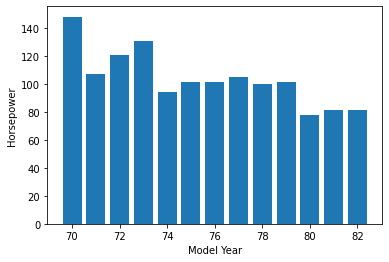

In [82]:
# Below I create a dataframe that consists of average horsepower values per model year vehicle

model_horsepower = car_data.groupby('model year', as_index=False)['horsepower'].mean()

# Below I identify x and y values for the bar graph, and plot it below

c = model_horsepower['model year']
d = model_horsepower.horsepower

plt.bar(c,d)

plt.xlabel("Model Year")
plt.ylabel("Horsepower")